In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
import math 

In [29]:
path='D:\\Data\\Harmaline induced tremor\\Analysis\\WT'
path_rawfiles='D:\\Data\\Harmaline induced tremor\\Raw files\\WT\\Raw files WT 2021'
os.chdir(path)
df = pd.read_excel('All_WT_2020.xlsx')
mouse = df['Mouse nr'].unique()
drug = df['drug'].unique()
dose = df['Dosis'].unique()
df.set_index(['Mouse nr'], inplace=True)
df.head()

,Unnamed: 0,Filename,drug,Dosis,name
Mouse nr,,,,,
1,0,Raw2017-03-30(12_03_00).csv,WINN,10 ul,resting
1,1,Raw2017-03-30(12_49_45).csv,WINN,10 ul,harmaline
1,2,Raw2017-03-30(13_53_45).csv,WINN,10 ul,it
2,3,Raw2017-03-31(10_56_24).csv,Vehicle,10 ul,resting
2,4,Raw2017-03-31(11_46_48).csv,Vehicle,10 ul,harmaline


In [30]:
select_WINN = df['drug'] == 'WINN'
WINN = df[select_WINN].index.unique(level='Mouse nr')
select_Vehicle = df['drug'] == 'Vehicle'
Vehicle = df[select_Vehicle].index.unique(level='Mouse nr')

resting= df['name'] == 'resting'
harmaline= df['name'] == 'harmaline'
it= df['name'] == 'it'


df_WINN = df[select_WINN]
df_Vehicle = df[select_Vehicle]

df_WINN_rest = df[select_WINN & resting]
df_Vehicle_rest = df[select_Vehicle & resting]

df_WINN_harm = df[select_WINN & harmaline]
df_Vehicle_harm = df[select_Vehicle & harmaline]


df_WINN_it = df[select_WINN & it]
df_Vehicle_it = df[select_Vehicle & it]

df_pos_resting = df_WINN_rest
df_pos_harm = df_WINN_harm
df_pos_it = df_WINN_it4

df_neg_resting = df_Vehicle_rest
df_neg_harm = df_Vehicle_harm
df_neg_it = df_Vehicle_it

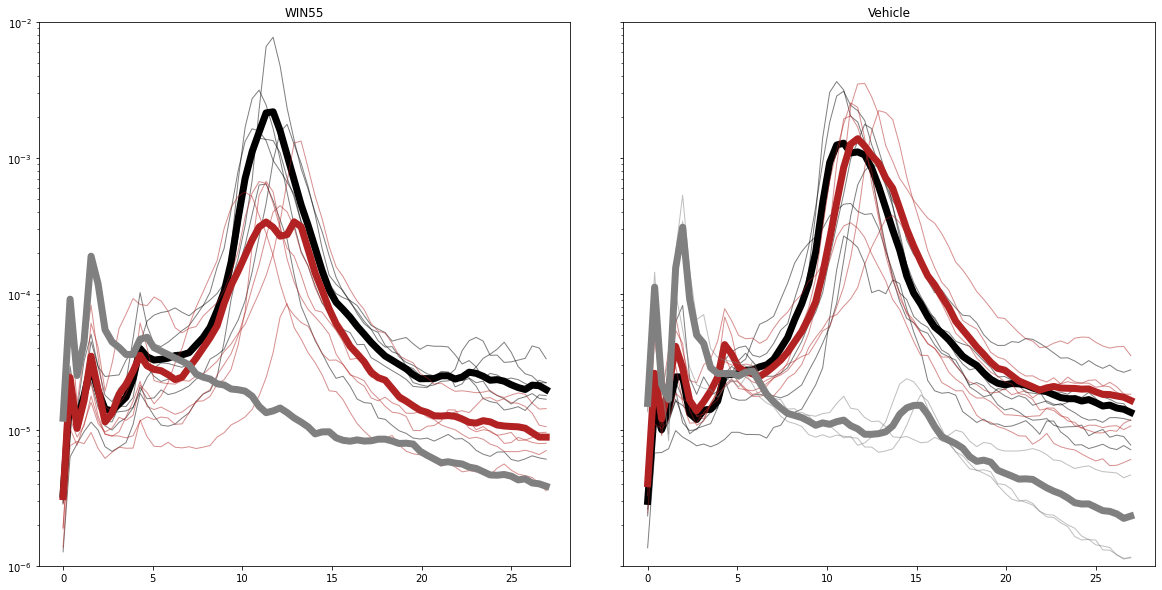

In [31]:
#Visualize two against each other
os.chdir(path_rawfiles)

tPH = []
tPI = []
tPR = []
tNH = []
tNI = []
tNR = []

for index, row in df_pos_harm.iterrows():
    filename = row["Filename"]
    dfi= pd.read_csv(filename)
    x =np.array(dfi['X raw (m/s^2)'].values)
    y =np.array(dfi['Y raw (m/s^2)'].values)
    xy4 = (x+y)/2
    tPH.append(xy4)
for index, row in df_pos_it.iterrows():
    filename = row["Filename"]
    dfi= pd.read_csv(filename)
    x =np.array(dfi['X raw (m/s^2)'].values)
    y =np.array(dfi['Y raw (m/s^2)'].values)
    xy4 = (x+y)/2
    tPI.append(xy4)
for index, row in df_pos_resting.iterrows():
    filename = row["Filename"]
    dfi= pd.read_csv(filename)
    x =np.array(dfi['X raw (m/s^2)'].values)
    y =np.array(dfi['Y raw (m/s^2)'].values)
    xy4 = (x+y)/2
    tPR.append(xy4)
    
val_MP = [tPH, tPI, tPR]
df_val = pd.DataFrame(val_MP)

fig2, axs = plt.subplots(1,2, figsize=(20, 10), sharey = True, sharex = True)
fig2.subplots_adjust(hspace = 0.1, wspace = 0.1 )
colors = ['black', 'firebrick', 'grey']
axs = axs.ravel()
r = slice(0,70)
pos_psd = []
pos_freqs = []
for k in range(len(val_MP)):
    psd_control = []
    freqs_control = []
    for i in range(len(val_MP[k])):
        freqsC, psdC = signal.welch(val_MP[k][i], 100)
        axs[0].semilogy(freqsC[r], psdC[r], color = colors[k], alpha=0.5, linewidth=1.0)
        meanPsd = np.mean(psdC[r])
        meanFreqs = np.mean(freqsC[r])
        psd_control.append(psdC[r])
        freqs_control.append(freqsC[r])    
    psdM = np.mean(psd_control, axis = 0)
    freqsM = np.mean(freqs_control, axis = 0)
    limit_psd = psdM[(freqsM<20)  & (freqsM>5)]
    axs[0].semilogy(freqsM, psdM, linewidth=7.0, color = colors[k])
    axs[0].set_ylim([0.000001, 0.01])
    axs[0].set_title('WIN55')
    pos_psd.append(psdM)
    pos_freqs.append(freqsM)

#negative

neg_psd = []
neg_freqs = []    
for index, row in df_neg_harm.iterrows():
    filename = row["Filename"]
    dfi= pd.read_csv(filename)
    x =np.array(dfi['X raw (m/s^2)'].values)
    y =np.array(dfi['Y raw (m/s^2)'].values)
    xy4 = (x+y)/2
    tNH.append(xy4)
    
for index, row in df_neg_it.iterrows():
    filename = row["Filename"]
    dfi= pd.read_csv(filename)
    x =np.array(dfi['X raw (m/s^2)'].values)
    y =np.array(dfi['Y raw (m/s^2)'].values)
    xy4 = (x+y)/2
    tNI.append(xy4)

for index, row in df_neg_resting.iterrows():
    filename = row["Filename"]
    dfi= pd.read_csv(filename)
    x =np.array(dfi['X raw (m/s^2)'].values)
    y =np.array(dfi['Y raw (m/s^2)'].values)
    xy4 = (x+y)/2
    tNR.append(xy4)
    
val_M = [tNH, tNI, tNR]
df_val = pd.DataFrame(val_M)

for k in range(len(val_M)):
    psd_control = []
    freqs_control = []
    All_psd = []
    for i in range(len(val_M[k])):
        freqsC, psdC = signal.welch(val_M[k][i], 100)
        axs[1].semilogy(freqsC[r], psdC[r], color = colors[k], alpha=0.5, linewidth=1.0)
        meanPsd = np.mean(psdC[r])
        meanFreqs = np.mean(freqsC[r])
        psd_control.append(psdC[r])
        freqs_control.append(freqsC[r])

    psdM = np.mean(psd_control, axis = 0)
    freqsM = np.mean(freqs_control, axis = 0)
    limit_psd = psdM[(freqsM<20)  & (freqsM>5)]
    axs[1].semilogy(freqsM, psdM, linewidth=7.0, color = colors[k])
    axs[1].set_ylim([0.000001, 0.01])
    axs[1].set_title('Vehicle')
    neg_psd.append(psdM)
    neg_freqs.append(freqsM)
    


In [32]:
os.chdir(path)
fig2.savefig('Traces Mean 2021 WT from 0.svg')
fig2.savefig('Traces Mean 2021 WT from 0.pdf')

In [24]:
psd_neg_harm = []
for index, row in df_neg_harm.iterrows():
    filename = row["Filename"]
    dfi= pd.read_csv(filename)
    x =np.array(dfi['X raw (m/s^2)'].values)
    y =np.array(dfi['Y raw (m/s^2)'].values)
    xy4 = (x+y)/2
    freqsC, psdC = signal.welch(xy4, 100)
    psd_neg_harm.append(psdC)
    
psd_neg_it = []
for index, row in df_neg_it.iterrows():
    filename = row["Filename"]
    dfi= pd.read_csv(filename)
    x =np.array(dfi['X raw (m/s^2)'].values)
    y =np.array(dfi['Y raw (m/s^2)'].values)
    xy4 = (x+y)/2
    freqsC, psdC = signal.welch(xy4, 100)
    psd_neg_it.append(psdC)
    
psd_pos_harm = []
for index, row in df_pos_harm.iterrows():
    filename = row["Filename"]
    dfi= pd.read_csv(filename)
    x =np.array(dfi['X raw (m/s^2)'].values)
    y =np.array(dfi['Y raw (m/s^2)'].values)
    xy4 = (x+y)/2
    freqsC, psdC = signal.welch(xy4, 100)
    psd_pos_harm.append(psdC)
    
psd_pos_it = []
for index, row in df_pos_it.iterrows():
    filename = row["Filename"]
    dfi= pd.read_csv(filename)
    x =np.array(dfi['X raw (m/s^2)'].values)
    y =np.array(dfi['Y raw (m/s^2)'].values)
    xy4 = (x+y)/2
    freqsC, psdC = signal.welch(xy4, 100)
    psd_pos_it.append(psdC)

In [28]:
r = slice(21,64)
AUC_pos_harm = []
AUC_pos_it = []
AUC_neg_harm = []
AUC_neg_it = []
for i in range(len(psd_pos_harm)):
    AUC_pos_harm.append(np.trapz(psd_pos_harm[i][r]))
    AUC_pos_it.append(np.trapz(psd_pos_it[i][r]))
for i in range(len(psd_neg_harm)):
    AUC_neg_harm.append(np.trapz(psd_neg_harm[i][r]))
    AUC_neg_it.append(np.trapz(psd_neg_it[i][r]))
dfAUC = pd.DataFrame([AUC_pos_harm, AUC_pos_it, AUC_neg_harm, AUC_neg_it], index=['Pos_harm', 'Pos_it', 'Neg_harm', 'Neg_it']).T
dfAUC

,Pos_harm,Pos_it,Neg_harm,Neg_it
0,0.016014,0.003538,0.002225,0.010755
1,0.030149,0.004940,0.019440,0.012551
2,0.003977,0.000713,0.005444,0.003110
3,0.010503,0.007475,0.010724,0.013779
4,0.010063,0.003493,0.006494,0.003827
5,0.012766,0.004305,0.021782,0.023403
